# UCLA Results Validation

This notebook is aimed at attemping to validate the results achieved by UCLA in their paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [25]:
from protestDB import cursor
import time
from protestDB import models
from lib import analysis_utils as au
import pandas as pd
import os
from matplotlib import pyplot
from PIL import Image
import numpy as np
import scipy
from keras import models as Kmodels
from keras import backend as Kbackend
from keras import applications as Kapplications
from keras import layers as Klayers
from keras import callbacks as Kcallbacks
from keras import optimizers as Koptimizers
from keras import losses as Klosses
import h5py

### Loading up the data

In [44]:
# Take a sample of 500 images and their respective labels
pc = cursor.ProtestCursor()
imgs = pc.query(models.Images).filter(models.Images.source == 'UCLA').all()


Get the labels

In [46]:

headers = ["name", "protest", "violence", "sign", "photo", "fire", "police", "children", "group_20", "group_100", "flag", "night", "shouting"]
df = pd.DataFrame(columns=headers)
indx_non_violence = []

for indx, im in enumerate(imgs):
    print("loading image number ", indx)
    tags = im.tags
    values = {}
    values['name'] = im.name
    
    label = im.labels
    if len(label) == 1:
        values['violence'] = label[0].label
    elif len(label) == 0:
        values['violence'] = 0
        indx_non_violence.append(indx) # save the index of a image without label for later removing value
    else:
        raise ValueError("there should not be more than one label")
    
    if not tags is None:   
        for tag in tags:
            if tag.tagName == 'ucla-test': continue # ignore this
            values[tag.tagName] = 1
    df = df.append(values, ignore_index=True)




loading image number  0
loading image number  1
loading image number  2
loading image number  3
loading image number  4
loading image number  5
loading image number  6
loading image number  7
loading image number  8
loading image number  9
loading image number  10
loading image number  11
loading image number  12
loading image number  13
loading image number  14
loading image number  15
loading image number  16
loading image number  17
loading image number  18
loading image number  19
loading image number  20
loading image number  21
loading image number  22
loading image number  23
loading image number  24
loading image number  25
loading image number  26
loading image number  27
loading image number  28
loading image number  29
loading image number  30
loading image number  31
loading image number  32
loading image number  33
loading image number  34
loading image number  35
loading image number  36
loading image number  37
loading image number  38
loading image number  39
loading im

loading image number  325
loading image number  326
loading image number  327
loading image number  328
loading image number  329
loading image number  330
loading image number  331
loading image number  332
loading image number  333
loading image number  334
loading image number  335
loading image number  336
loading image number  337
loading image number  338
loading image number  339
loading image number  340
loading image number  341
loading image number  342
loading image number  343
loading image number  344
loading image number  345
loading image number  346
loading image number  347
loading image number  348
loading image number  349
loading image number  350
loading image number  351
loading image number  352
loading image number  353
loading image number  354
loading image number  355
loading image number  356
loading image number  357
loading image number  358
loading image number  359
loading image number  360
loading image number  361
loading image number  362
loading imag

loading image number  644
loading image number  645
loading image number  646
loading image number  647
loading image number  648
loading image number  649
loading image number  650
loading image number  651
loading image number  652
loading image number  653
loading image number  654
loading image number  655
loading image number  656
loading image number  657
loading image number  658
loading image number  659
loading image number  660
loading image number  661
loading image number  662
loading image number  663
loading image number  664
loading image number  665
loading image number  666
loading image number  667
loading image number  668
loading image number  669
loading image number  670
loading image number  671
loading image number  672
loading image number  673
loading image number  674
loading image number  675
loading image number  676
loading image number  677
loading image number  678
loading image number  679
loading image number  680
loading image number  681
loading imag

loading image number  961
loading image number  962
loading image number  963
loading image number  964
loading image number  965
loading image number  966
loading image number  967
loading image number  968
loading image number  969
loading image number  970
loading image number  971
loading image number  972
loading image number  973
loading image number  974
loading image number  975
loading image number  976
loading image number  977
loading image number  978
loading image number  979
loading image number  980
loading image number  981
loading image number  982
loading image number  983
loading image number  984
loading image number  985
loading image number  986
loading image number  987
loading image number  988
loading image number  989
loading image number  990
loading image number  991
loading image number  992
loading image number  993
loading image number  994
loading image number  995
loading image number  996
loading image number  997
loading image number  998
loading imag

loading image number  1269
loading image number  1270
loading image number  1271
loading image number  1272
loading image number  1273
loading image number  1274
loading image number  1275
loading image number  1276
loading image number  1277
loading image number  1278
loading image number  1279
loading image number  1280
loading image number  1281
loading image number  1282
loading image number  1283
loading image number  1284
loading image number  1285
loading image number  1286
loading image number  1287
loading image number  1288
loading image number  1289
loading image number  1290
loading image number  1291
loading image number  1292
loading image number  1293
loading image number  1294
loading image number  1295
loading image number  1296
loading image number  1297
loading image number  1298
loading image number  1299
loading image number  1300
loading image number  1301
loading image number  1302
loading image number  1303
loading image number  1304
loading image number  1305
l

loading image number  1580
loading image number  1581
loading image number  1582
loading image number  1583
loading image number  1584
loading image number  1585
loading image number  1586
loading image number  1587
loading image number  1588
loading image number  1589
loading image number  1590
loading image number  1591
loading image number  1592
loading image number  1593
loading image number  1594
loading image number  1595
loading image number  1596
loading image number  1597
loading image number  1598
loading image number  1599
loading image number  1600
loading image number  1601
loading image number  1602
loading image number  1603
loading image number  1604
loading image number  1605
loading image number  1606
loading image number  1607
loading image number  1608
loading image number  1609
loading image number  1610
loading image number  1611
loading image number  1612
loading image number  1613
loading image number  1614
loading image number  1615
loading image number  1616
l

loading image number  1886
loading image number  1887
loading image number  1888
loading image number  1889
loading image number  1890
loading image number  1891
loading image number  1892
loading image number  1893
loading image number  1894
loading image number  1895
loading image number  1896
loading image number  1897
loading image number  1898
loading image number  1899
loading image number  1900
loading image number  1901
loading image number  1902
loading image number  1903
loading image number  1904
loading image number  1905
loading image number  1906
loading image number  1907
loading image number  1908
loading image number  1909
loading image number  1910
loading image number  1911
loading image number  1912
loading image number  1913
loading image number  1914
loading image number  1915
loading image number  1916
loading image number  1917
loading image number  1918
loading image number  1919
loading image number  1920
loading image number  1921
loading image number  1922
l

loading image number  2191
loading image number  2192
loading image number  2193
loading image number  2194
loading image number  2195
loading image number  2196
loading image number  2197
loading image number  2198
loading image number  2199
loading image number  2200
loading image number  2201
loading image number  2202
loading image number  2203
loading image number  2204
loading image number  2205
loading image number  2206
loading image number  2207
loading image number  2208
loading image number  2209
loading image number  2210
loading image number  2211
loading image number  2212
loading image number  2213
loading image number  2214
loading image number  2215
loading image number  2216
loading image number  2217
loading image number  2218
loading image number  2219
loading image number  2220
loading image number  2221
loading image number  2222
loading image number  2223
loading image number  2224
loading image number  2225
loading image number  2226
loading image number  2227
l

loading image number  2499
loading image number  2500
loading image number  2501
loading image number  2502
loading image number  2503
loading image number  2504
loading image number  2505
loading image number  2506
loading image number  2507
loading image number  2508
loading image number  2509
loading image number  2510
loading image number  2511
loading image number  2512
loading image number  2513
loading image number  2514
loading image number  2515
loading image number  2516
loading image number  2517
loading image number  2518
loading image number  2519
loading image number  2520
loading image number  2521
loading image number  2522
loading image number  2523
loading image number  2524
loading image number  2525
loading image number  2526
loading image number  2527
loading image number  2528
loading image number  2529
loading image number  2530
loading image number  2531
loading image number  2532
loading image number  2533
loading image number  2534
loading image number  2535
l

loading image number  2805
loading image number  2806
loading image number  2807
loading image number  2808
loading image number  2809
loading image number  2810
loading image number  2811
loading image number  2812
loading image number  2813
loading image number  2814
loading image number  2815
loading image number  2816
loading image number  2817
loading image number  2818
loading image number  2819
loading image number  2820
loading image number  2821
loading image number  2822
loading image number  2823
loading image number  2824
loading image number  2825
loading image number  2826
loading image number  2827
loading image number  2828
loading image number  2829
loading image number  2830
loading image number  2831
loading image number  2832
loading image number  2833
loading image number  2834
loading image number  2835
loading image number  2836
loading image number  2837
loading image number  2838
loading image number  2839
loading image number  2840
loading image number  2841
l

loading image number  3109
loading image number  3110
loading image number  3111
loading image number  3112
loading image number  3113
loading image number  3114
loading image number  3115
loading image number  3116
loading image number  3117
loading image number  3118
loading image number  3119
loading image number  3120
loading image number  3121
loading image number  3122
loading image number  3123
loading image number  3124
loading image number  3125
loading image number  3126
loading image number  3127
loading image number  3128
loading image number  3129
loading image number  3130
loading image number  3131
loading image number  3132
loading image number  3133
loading image number  3134
loading image number  3135
loading image number  3136
loading image number  3137
loading image number  3138
loading image number  3139
loading image number  3140
loading image number  3141
loading image number  3142
loading image number  3143
loading image number  3144
loading image number  3145
l

loading image number  3413
loading image number  3414
loading image number  3415
loading image number  3416
loading image number  3417
loading image number  3418
loading image number  3419
loading image number  3420
loading image number  3421
loading image number  3422
loading image number  3423
loading image number  3424
loading image number  3425
loading image number  3426
loading image number  3427
loading image number  3428
loading image number  3429
loading image number  3430
loading image number  3431
loading image number  3432
loading image number  3433
loading image number  3434
loading image number  3435
loading image number  3436
loading image number  3437
loading image number  3438
loading image number  3439
loading image number  3440
loading image number  3441
loading image number  3442
loading image number  3443
loading image number  3444
loading image number  3445
loading image number  3446
loading image number  3447
loading image number  3448
loading image number  3449
l

loading image number  3717
loading image number  3718
loading image number  3719
loading image number  3720
loading image number  3721
loading image number  3722
loading image number  3723
loading image number  3724
loading image number  3725
loading image number  3726
loading image number  3727
loading image number  3728
loading image number  3729
loading image number  3730
loading image number  3731
loading image number  3732
loading image number  3733
loading image number  3734
loading image number  3735
loading image number  3736
loading image number  3737
loading image number  3738
loading image number  3739
loading image number  3740
loading image number  3741
loading image number  3742
loading image number  3743
loading image number  3744
loading image number  3745
loading image number  3746
loading image number  3747
loading image number  3748
loading image number  3749
loading image number  3750
loading image number  3751
loading image number  3752
loading image number  3753
l

loading image number  4023
loading image number  4024
loading image number  4025
loading image number  4026
loading image number  4027
loading image number  4028
loading image number  4029
loading image number  4030
loading image number  4031
loading image number  4032
loading image number  4033
loading image number  4034
loading image number  4035
loading image number  4036
loading image number  4037
loading image number  4038
loading image number  4039
loading image number  4040
loading image number  4041
loading image number  4042
loading image number  4043
loading image number  4044
loading image number  4045
loading image number  4046
loading image number  4047
loading image number  4048
loading image number  4049
loading image number  4050
loading image number  4051
loading image number  4052
loading image number  4053
loading image number  4054
loading image number  4055
loading image number  4056
loading image number  4057
loading image number  4058
loading image number  4059
l

loading image number  4333
loading image number  4334
loading image number  4335
loading image number  4336
loading image number  4337
loading image number  4338
loading image number  4339
loading image number  4340
loading image number  4341
loading image number  4342
loading image number  4343
loading image number  4344
loading image number  4345
loading image number  4346
loading image number  4347
loading image number  4348
loading image number  4349
loading image number  4350
loading image number  4351
loading image number  4352
loading image number  4353
loading image number  4354
loading image number  4355
loading image number  4356
loading image number  4357
loading image number  4358
loading image number  4359
loading image number  4360
loading image number  4361
loading image number  4362
loading image number  4363
loading image number  4364
loading image number  4365
loading image number  4366
loading image number  4367
loading image number  4368
loading image number  4369
l

loading image number  4643
loading image number  4644
loading image number  4645
loading image number  4646
loading image number  4647
loading image number  4648
loading image number  4649
loading image number  4650
loading image number  4651
loading image number  4652
loading image number  4653
loading image number  4654
loading image number  4655
loading image number  4656
loading image number  4657
loading image number  4658
loading image number  4659
loading image number  4660
loading image number  4661
loading image number  4662
loading image number  4663
loading image number  4664
loading image number  4665
loading image number  4666
loading image number  4667
loading image number  4668
loading image number  4669
loading image number  4670
loading image number  4671
loading image number  4672
loading image number  4673
loading image number  4674
loading image number  4675
loading image number  4676
loading image number  4677
loading image number  4678
loading image number  4679
l

loading image number  4954
loading image number  4955
loading image number  4956
loading image number  4957
loading image number  4958
loading image number  4959
loading image number  4960
loading image number  4961
loading image number  4962
loading image number  4963
loading image number  4964
loading image number  4965
loading image number  4966
loading image number  4967
loading image number  4968
loading image number  4969
loading image number  4970
loading image number  4971
loading image number  4972
loading image number  4973
loading image number  4974
loading image number  4975
loading image number  4976
loading image number  4977
loading image number  4978
loading image number  4979
loading image number  4980
loading image number  4981
loading image number  4982
loading image number  4983
loading image number  4984
loading image number  4985
loading image number  4986
loading image number  4987
loading image number  4988
loading image number  4989
loading image number  4990
l

loading image number  5258
loading image number  5259
loading image number  5260
loading image number  5261
loading image number  5262
loading image number  5263
loading image number  5264
loading image number  5265
loading image number  5266
loading image number  5267
loading image number  5268
loading image number  5269
loading image number  5270
loading image number  5271
loading image number  5272
loading image number  5273
loading image number  5274
loading image number  5275
loading image number  5276
loading image number  5277
loading image number  5278
loading image number  5279
loading image number  5280
loading image number  5281
loading image number  5282
loading image number  5283
loading image number  5284
loading image number  5285
loading image number  5286
loading image number  5287
loading image number  5288
loading image number  5289
loading image number  5290
loading image number  5291
loading image number  5292
loading image number  5293
loading image number  5294
l

loading image number  5562
loading image number  5563
loading image number  5564
loading image number  5565
loading image number  5566
loading image number  5567
loading image number  5568
loading image number  5569
loading image number  5570
loading image number  5571
loading image number  5572
loading image number  5573
loading image number  5574
loading image number  5575
loading image number  5576
loading image number  5577
loading image number  5578
loading image number  5579
loading image number  5580
loading image number  5581
loading image number  5582
loading image number  5583
loading image number  5584
loading image number  5585
loading image number  5586
loading image number  5587
loading image number  5588
loading image number  5589
loading image number  5590
loading image number  5591
loading image number  5592
loading image number  5593
loading image number  5594
loading image number  5595
loading image number  5596
loading image number  5597
loading image number  5598
l

loading image number  5871
loading image number  5872
loading image number  5873
loading image number  5874
loading image number  5875
loading image number  5876
loading image number  5877
loading image number  5878
loading image number  5879
loading image number  5880
loading image number  5881
loading image number  5882
loading image number  5883
loading image number  5884
loading image number  5885
loading image number  5886
loading image number  5887
loading image number  5888
loading image number  5889
loading image number  5890
loading image number  5891
loading image number  5892
loading image number  5893
loading image number  5894
loading image number  5895
loading image number  5896
loading image number  5897
loading image number  5898
loading image number  5899
loading image number  5900
loading image number  5901
loading image number  5902
loading image number  5903
loading image number  5904
loading image number  5905
loading image number  5906
loading image number  5907
l

loading image number  6180
loading image number  6181
loading image number  6182
loading image number  6183
loading image number  6184
loading image number  6185
loading image number  6186
loading image number  6187
loading image number  6188
loading image number  6189
loading image number  6190
loading image number  6191
loading image number  6192
loading image number  6193
loading image number  6194
loading image number  6195
loading image number  6196
loading image number  6197
loading image number  6198
loading image number  6199
loading image number  6200
loading image number  6201
loading image number  6202
loading image number  6203
loading image number  6204
loading image number  6205
loading image number  6206
loading image number  6207
loading image number  6208
loading image number  6209
loading image number  6210
loading image number  6211
loading image number  6212
loading image number  6213
loading image number  6214
loading image number  6215
loading image number  6216
l

loading image number  6491
loading image number  6492
loading image number  6493
loading image number  6494
loading image number  6495
loading image number  6496
loading image number  6497
loading image number  6498
loading image number  6499
loading image number  6500
loading image number  6501
loading image number  6502
loading image number  6503
loading image number  6504
loading image number  6505
loading image number  6506
loading image number  6507
loading image number  6508
loading image number  6509
loading image number  6510
loading image number  6511
loading image number  6512
loading image number  6513
loading image number  6514
loading image number  6515
loading image number  6516
loading image number  6517
loading image number  6518
loading image number  6519
loading image number  6520
loading image number  6521
loading image number  6522
loading image number  6523
loading image number  6524
loading image number  6525
loading image number  6526
loading image number  6527
l

loading image number  6795
loading image number  6796
loading image number  6797
loading image number  6798
loading image number  6799
loading image number  6800
loading image number  6801
loading image number  6802
loading image number  6803
loading image number  6804
loading image number  6805
loading image number  6806
loading image number  6807
loading image number  6808
loading image number  6809
loading image number  6810
loading image number  6811
loading image number  6812
loading image number  6813
loading image number  6814
loading image number  6815
loading image number  6816
loading image number  6817
loading image number  6818
loading image number  6819
loading image number  6820
loading image number  6821
loading image number  6822
loading image number  6823
loading image number  6824
loading image number  6825
loading image number  6826
loading image number  6827
loading image number  6828
loading image number  6829
loading image number  6830
loading image number  6831
l

loading image number  7101
loading image number  7102
loading image number  7103
loading image number  7104
loading image number  7105
loading image number  7106
loading image number  7107
loading image number  7108
loading image number  7109
loading image number  7110
loading image number  7111
loading image number  7112
loading image number  7113
loading image number  7114
loading image number  7115
loading image number  7116
loading image number  7117
loading image number  7118
loading image number  7119
loading image number  7120
loading image number  7121
loading image number  7122
loading image number  7123
loading image number  7124
loading image number  7125
loading image number  7126
loading image number  7127
loading image number  7128
loading image number  7129
loading image number  7130
loading image number  7131
loading image number  7132
loading image number  7133
loading image number  7134
loading image number  7135
loading image number  7136
loading image number  7137
l

loading image number  7410
loading image number  7411
loading image number  7412
loading image number  7413
loading image number  7414
loading image number  7415
loading image number  7416
loading image number  7417
loading image number  7418
loading image number  7419
loading image number  7420
loading image number  7421
loading image number  7422
loading image number  7423
loading image number  7424
loading image number  7425
loading image number  7426
loading image number  7427
loading image number  7428
loading image number  7429
loading image number  7430
loading image number  7431
loading image number  7432
loading image number  7433
loading image number  7434
loading image number  7435
loading image number  7436
loading image number  7437
loading image number  7438
loading image number  7439
loading image number  7440
loading image number  7441
loading image number  7442
loading image number  7443
loading image number  7444
loading image number  7445
loading image number  7446
l

loading image number  7719
loading image number  7720
loading image number  7721
loading image number  7722
loading image number  7723
loading image number  7724
loading image number  7725
loading image number  7726
loading image number  7727
loading image number  7728
loading image number  7729
loading image number  7730
loading image number  7731
loading image number  7732
loading image number  7733
loading image number  7734
loading image number  7735
loading image number  7736
loading image number  7737
loading image number  7738
loading image number  7739
loading image number  7740
loading image number  7741
loading image number  7742
loading image number  7743
loading image number  7744
loading image number  7745
loading image number  7746
loading image number  7747
loading image number  7748
loading image number  7749
loading image number  7750
loading image number  7751
loading image number  7752
loading image number  7753
loading image number  7754
loading image number  7755
l

loading image number  8027
loading image number  8028
loading image number  8029
loading image number  8030
loading image number  8031
loading image number  8032
loading image number  8033
loading image number  8034
loading image number  8035
loading image number  8036
loading image number  8037
loading image number  8038
loading image number  8039
loading image number  8040
loading image number  8041
loading image number  8042
loading image number  8043
loading image number  8044
loading image number  8045
loading image number  8046
loading image number  8047
loading image number  8048
loading image number  8049
loading image number  8050
loading image number  8051
loading image number  8052
loading image number  8053
loading image number  8054
loading image number  8055
loading image number  8056
loading image number  8057
loading image number  8058
loading image number  8059
loading image number  8060
loading image number  8061
loading image number  8062
loading image number  8063
l

loading image number  8333
loading image number  8334
loading image number  8335
loading image number  8336
loading image number  8337
loading image number  8338
loading image number  8339
loading image number  8340
loading image number  8341
loading image number  8342
loading image number  8343
loading image number  8344
loading image number  8345
loading image number  8346
loading image number  8347
loading image number  8348
loading image number  8349
loading image number  8350
loading image number  8351
loading image number  8352
loading image number  8353
loading image number  8354
loading image number  8355
loading image number  8356
loading image number  8357
loading image number  8358
loading image number  8359
loading image number  8360
loading image number  8361
loading image number  8362
loading image number  8363
loading image number  8364
loading image number  8365
loading image number  8366
loading image number  8367
loading image number  8368
loading image number  8369
l

loading image number  8644
loading image number  8645
loading image number  8646
loading image number  8647
loading image number  8648
loading image number  8649
loading image number  8650
loading image number  8651
loading image number  8652
loading image number  8653
loading image number  8654
loading image number  8655
loading image number  8656
loading image number  8657
loading image number  8658
loading image number  8659
loading image number  8660
loading image number  8661
loading image number  8662
loading image number  8663
loading image number  8664
loading image number  8665
loading image number  8666
loading image number  8667
loading image number  8668
loading image number  8669
loading image number  8670
loading image number  8671
loading image number  8672
loading image number  8673
loading image number  8674
loading image number  8675
loading image number  8676
loading image number  8677
loading image number  8678
loading image number  8679
loading image number  8680
l

loading image number  8953
loading image number  8954
loading image number  8955
loading image number  8956
loading image number  8957
loading image number  8958
loading image number  8959
loading image number  8960
loading image number  8961
loading image number  8962
loading image number  8963
loading image number  8964
loading image number  8965
loading image number  8966
loading image number  8967
loading image number  8968
loading image number  8969
loading image number  8970
loading image number  8971
loading image number  8972
loading image number  8973
loading image number  8974
loading image number  8975
loading image number  8976
loading image number  8977
loading image number  8978
loading image number  8979
loading image number  8980
loading image number  8981
loading image number  8982
loading image number  8983
loading image number  8984
loading image number  8985
loading image number  8986
loading image number  8987
loading image number  8988
loading image number  8989
l

loading image number  9260
loading image number  9261
loading image number  9262
loading image number  9263
loading image number  9264
loading image number  9265
loading image number  9266
loading image number  9267
loading image number  9268
loading image number  9269
loading image number  9270
loading image number  9271
loading image number  9272
loading image number  9273
loading image number  9274
loading image number  9275
loading image number  9276
loading image number  9277
loading image number  9278
loading image number  9279
loading image number  9280
loading image number  9281
loading image number  9282
loading image number  9283
loading image number  9284
loading image number  9285
loading image number  9286
loading image number  9287
loading image number  9288
loading image number  9289
loading image number  9290
loading image number  9291
loading image number  9292
loading image number  9293
loading image number  9294
loading image number  9295
loading image number  9296
l

loading image number  9566
loading image number  9567
loading image number  9568
loading image number  9569
loading image number  9570
loading image number  9571
loading image number  9572
loading image number  9573
loading image number  9574
loading image number  9575
loading image number  9576
loading image number  9577
loading image number  9578
loading image number  9579
loading image number  9580
loading image number  9581
loading image number  9582
loading image number  9583
loading image number  9584
loading image number  9585
loading image number  9586
loading image number  9587
loading image number  9588
loading image number  9589
loading image number  9590
loading image number  9591
loading image number  9592
loading image number  9593
loading image number  9594
loading image number  9595
loading image number  9596
loading image number  9597
loading image number  9598
loading image number  9599
loading image number  9600
loading image number  9601
loading image number  9602
l

loading image number  9871
loading image number  9872
loading image number  9873
loading image number  9874
loading image number  9875
loading image number  9876
loading image number  9877
loading image number  9878
loading image number  9879
loading image number  9880
loading image number  9881
loading image number  9882
loading image number  9883
loading image number  9884
loading image number  9885
loading image number  9886
loading image number  9887
loading image number  9888
loading image number  9889
loading image number  9890
loading image number  9891
loading image number  9892
loading image number  9893
loading image number  9894
loading image number  9895
loading image number  9896
loading image number  9897
loading image number  9898
loading image number  9899
loading image number  9900
loading image number  9901
loading image number  9902
loading image number  9903
loading image number  9904
loading image number  9905
loading image number  9906
loading image number  9907
l

loading image number  10169
loading image number  10170
loading image number  10171
loading image number  10172
loading image number  10173
loading image number  10174
loading image number  10175
loading image number  10176
loading image number  10177
loading image number  10178
loading image number  10179
loading image number  10180
loading image number  10181
loading image number  10182
loading image number  10183
loading image number  10184
loading image number  10185
loading image number  10186
loading image number  10187
loading image number  10188
loading image number  10189
loading image number  10190
loading image number  10191
loading image number  10192
loading image number  10193
loading image number  10194
loading image number  10195
loading image number  10196
loading image number  10197
loading image number  10198
loading image number  10199
loading image number  10200
loading image number  10201
loading image number  10202
loading image number  10203
loading image number

loading image number  10466
loading image number  10467
loading image number  10468
loading image number  10469
loading image number  10470
loading image number  10471
loading image number  10472
loading image number  10473
loading image number  10474
loading image number  10475
loading image number  10476
loading image number  10477
loading image number  10478
loading image number  10479
loading image number  10480
loading image number  10481
loading image number  10482
loading image number  10483
loading image number  10484
loading image number  10485
loading image number  10486
loading image number  10487
loading image number  10488
loading image number  10489
loading image number  10490
loading image number  10491
loading image number  10492
loading image number  10493
loading image number  10494
loading image number  10495
loading image number  10496
loading image number  10497
loading image number  10498
loading image number  10499
loading image number  10500
loading image number

loading image number  10766
loading image number  10767
loading image number  10768
loading image number  10769
loading image number  10770
loading image number  10771
loading image number  10772
loading image number  10773
loading image number  10774
loading image number  10775
loading image number  10776
loading image number  10777
loading image number  10778
loading image number  10779
loading image number  10780
loading image number  10781
loading image number  10782
loading image number  10783
loading image number  10784
loading image number  10785
loading image number  10786
loading image number  10787
loading image number  10788
loading image number  10789
loading image number  10790
loading image number  10791
loading image number  10792
loading image number  10793
loading image number  10794
loading image number  10795
loading image number  10796
loading image number  10797
loading image number  10798
loading image number  10799
loading image number  10800
loading image number

loading image number  11060
loading image number  11061
loading image number  11062
loading image number  11063
loading image number  11064
loading image number  11065
loading image number  11066
loading image number  11067
loading image number  11068
loading image number  11069
loading image number  11070
loading image number  11071
loading image number  11072
loading image number  11073
loading image number  11074
loading image number  11075
loading image number  11076
loading image number  11077
loading image number  11078
loading image number  11079
loading image number  11080
loading image number  11081
loading image number  11082
loading image number  11083
loading image number  11084
loading image number  11085
loading image number  11086
loading image number  11087
loading image number  11088
loading image number  11089
loading image number  11090
loading image number  11091
loading image number  11092
loading image number  11093
loading image number  11094
loading image number

loading image number  11357
loading image number  11358
loading image number  11359
loading image number  11360
loading image number  11361
loading image number  11362
loading image number  11363
loading image number  11364
loading image number  11365
loading image number  11366
loading image number  11367
loading image number  11368
loading image number  11369
loading image number  11370
loading image number  11371
loading image number  11372
loading image number  11373
loading image number  11374
loading image number  11375
loading image number  11376
loading image number  11377
loading image number  11378
loading image number  11379
loading image number  11380
loading image number  11381
loading image number  11382
loading image number  11383
loading image number  11384
loading image number  11385
loading image number  11386
loading image number  11387
loading image number  11388
loading image number  11389
loading image number  11390
loading image number  11391
loading image number

loading image number  11653
loading image number  11654
loading image number  11655
loading image number  11656
loading image number  11657
loading image number  11658
loading image number  11659
loading image number  11660
loading image number  11661
loading image number  11662
loading image number  11663
loading image number  11664
loading image number  11665
loading image number  11666
loading image number  11667
loading image number  11668
loading image number  11669
loading image number  11670
loading image number  11671
loading image number  11672
loading image number  11673
loading image number  11674
loading image number  11675
loading image number  11676
loading image number  11677
loading image number  11678
loading image number  11679
loading image number  11680
loading image number  11681
loading image number  11682
loading image number  11683
loading image number  11684
loading image number  11685
loading image number  11686
loading image number  11687
loading image number

loading image number  11950
loading image number  11951
loading image number  11952
loading image number  11953
loading image number  11954
loading image number  11955
loading image number  11956
loading image number  11957
loading image number  11958
loading image number  11959
loading image number  11960
loading image number  11961
loading image number  11962
loading image number  11963
loading image number  11964
loading image number  11965
loading image number  11966
loading image number  11967
loading image number  11968
loading image number  11969
loading image number  11970
loading image number  11971
loading image number  11972
loading image number  11973
loading image number  11974
loading image number  11975
loading image number  11976
loading image number  11977
loading image number  11978
loading image number  11979
loading image number  11980
loading image number  11981
loading image number  11982
loading image number  11983
loading image number  11984
loading image number

loading image number  12247
loading image number  12248
loading image number  12249
loading image number  12250
loading image number  12251
loading image number  12252
loading image number  12253
loading image number  12254
loading image number  12255
loading image number  12256
loading image number  12257
loading image number  12258
loading image number  12259
loading image number  12260
loading image number  12261
loading image number  12262
loading image number  12263
loading image number  12264
loading image number  12265
loading image number  12266
loading image number  12267
loading image number  12268
loading image number  12269
loading image number  12270
loading image number  12271
loading image number  12272
loading image number  12273
loading image number  12274
loading image number  12275
loading image number  12276
loading image number  12277
loading image number  12278
loading image number  12279
loading image number  12280
loading image number  12281
loading image number

loading image number  12541
loading image number  12542
loading image number  12543
loading image number  12544
loading image number  12545
loading image number  12546
loading image number  12547
loading image number  12548
loading image number  12549
loading image number  12550
loading image number  12551
loading image number  12552
loading image number  12553
loading image number  12554
loading image number  12555
loading image number  12556
loading image number  12557
loading image number  12558
loading image number  12559
loading image number  12560
loading image number  12561
loading image number  12562
loading image number  12563
loading image number  12564
loading image number  12565
loading image number  12566
loading image number  12567
loading image number  12568
loading image number  12569
loading image number  12570
loading image number  12571
loading image number  12572
loading image number  12573
loading image number  12574
loading image number  12575
loading image number

loading image number  12837
loading image number  12838
loading image number  12839
loading image number  12840
loading image number  12841
loading image number  12842
loading image number  12843
loading image number  12844
loading image number  12845
loading image number  12846
loading image number  12847
loading image number  12848
loading image number  12849
loading image number  12850
loading image number  12851
loading image number  12852
loading image number  12853
loading image number  12854
loading image number  12855
loading image number  12856
loading image number  12857
loading image number  12858
loading image number  12859
loading image number  12860
loading image number  12861
loading image number  12862
loading image number  12863
loading image number  12864
loading image number  12865
loading image number  12866
loading image number  12867
loading image number  12868
loading image number  12869
loading image number  12870
loading image number  12871
loading image number

loading image number  13136
loading image number  13137
loading image number  13138
loading image number  13139
loading image number  13140
loading image number  13141
loading image number  13142
loading image number  13143
loading image number  13144
loading image number  13145
loading image number  13146
loading image number  13147
loading image number  13148
loading image number  13149
loading image number  13150
loading image number  13151
loading image number  13152
loading image number  13153
loading image number  13154
loading image number  13155
loading image number  13156
loading image number  13157
loading image number  13158
loading image number  13159
loading image number  13160
loading image number  13161
loading image number  13162
loading image number  13163
loading image number  13164
loading image number  13165
loading image number  13166
loading image number  13167
loading image number  13168
loading image number  13169
loading image number  13170
loading image number

loading image number  13433
loading image number  13434
loading image number  13435
loading image number  13436
loading image number  13437
loading image number  13438
loading image number  13439
loading image number  13440
loading image number  13441
loading image number  13442
loading image number  13443
loading image number  13444
loading image number  13445
loading image number  13446
loading image number  13447
loading image number  13448
loading image number  13449
loading image number  13450
loading image number  13451
loading image number  13452
loading image number  13453
loading image number  13454
loading image number  13455
loading image number  13456
loading image number  13457
loading image number  13458
loading image number  13459
loading image number  13460
loading image number  13461
loading image number  13462
loading image number  13463
loading image number  13464
loading image number  13465
loading image number  13466
loading image number  13467
loading image number

KeyboardInterrupt: 

### Pre-processing

In [6]:
# Apply a cut point and normalize violence scores
cutpoint = 0.43

#clips
df = au.ClipDFColumn(df, 'violence', cutpoint)

# normalize
df = au.MinMax(df, 'violence')

# mask values that did not had violence labels
df.loc[indx_non_violence, 'violence'] = -1

# masks the visual attributes that where image is not a protest
for column, value in df.iloc[:,3:].iteritems(): # fill visual attributes with masking
    df.loc[pd.isnull(df['protest']), column] = -1
    
# fill nas
df.fillna(0, inplace = True)
df

,name,protest,violence,sign,photo,fire,police,children,group_20,group_100,flag,night,shouting
0,test-00000.jpg,1,0.632513,1,0.0,0.0,0.0,0.0,1,1,0.0,1,0.0
1,test-00001.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
2,test-00002.jpg,1,0.370518,1,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0
3,test-00003.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
4,test-00004.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
5,test-00005.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
6,test-00006.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
7,test-00007.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
8,test-00008.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0
9,test-00009.jpg,0,-1.000000,-1,-1.0,-1.0,-1.0,-1.0,-1,-1,-1.0,-1,-1.0


Get the images

In [7]:
batch_size = 32

In [8]:
dummy_test_generator = au.ResizeSequence(df[:5], batch_size, 
                                         targets = ['protest', 'violence', df.columns[3:].tolist()])
train_generator = au.ResizeSequence(df[:100], batch_size, 
                                    targets = ['protest', 'violence', df.columns[3:].tolist()])
validation_generator = au.ResizeSequence(df[100:200], batch_size, 
                                         targets = ['protest', 'violence', df.columns[3:].tolist()])
test_generator = au.ResizeSequence(df[200:300], 1, 
                                   targets = ['protest', 'violence', df.columns[3:].tolist()])

test_visual = np.array(df.iloc[:,3:])[200:300]
test_violence = np.array(df['violence'])[200:300] 
test_protest = np.array(df['protest'])[200:300] 

protest has shape (10,)  violence has shape (10,)  visual has shape (10, 10)


/home/lucas/Documents/ITU/Thesis_2018/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


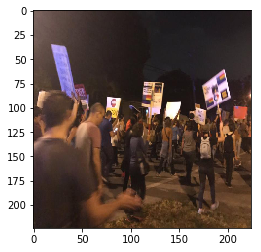

In [9]:
# test generator
first = dummy_test_generator.__getitem__(0)
image = first[0][0]
protest = first[1][0]
violence = first[1][1]
visual = first[1][2]
img = scipy.misc.toimage(image)
pyplot.imshow(img)
print("protest has shape", protest.shape, " violence has shape", violence.shape, " visual has shape", visual.shape)

Select training and validation sets

### Modeling

In [30]:
mask_value = -1
Kbackend.clear_session()

In [31]:
img_input = Klayers.Input(shape=(224,224,3), name='img_input')

resnet_model = Kapplications.ResNet50(include_top=False, weights = 'imagenet') (img_input)

flatten = Klayers.Flatten()(resnet_model)

protest_out = Klayers.Dense(1, activation='sigmoid', name='protest_out')(flatten)
violence_out = Klayers.Dense(1, activation='sigmoid', name='violence_out')(flatten)
visual_out = Klayers.Dense(10, activation='sigmoid', name='visual_out')(flatten)

model = Kmodels.Model(inputs= img_input, outputs=[protest_out, violence_out, visual_out])




In [34]:
optimizer = Koptimizers.SGD(lr=lr, momentum=momentum, nesterov=False)
model.compile(optimizer='rmsprop',
              loss={'protest_out': losses.binary_crossentropy,
                    'visual_out': au.BuildMaskedLoss(losses.binary_crossentropy, mask_value), 
                    'violence_out': au.BuildMaskedLoss(losses.mean_squared_error, mask_value)},
              loss_weights={'protest_out': 1., 
                            'visual_out': 5, 
                            'violence_out': 10 })
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                multiple             23587712    img_input[0][0]                  
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2048)         0           resnet50[1][0]                   
__________________________________________________________________________________________________
protest_out (Dense)             (None, 1)            2049        flatten_1[0][0]                  
__________________________________________________________________________________________________
violence_o

In [35]:
lr = 0.01; momentum = 0.9; epochs = 5; patience = 15

In [36]:
model_checkout_path = "models/UCLA_validation.hdf5"
csv_logger_path = "logs/UCLA_validation_log.csv"
log_dir="logs/{}".format(time.time())

# callbacks
change_lr = Kcallbacks.LearningRateScheduler(au.LrUpdateUCLA, 
                                            verbose = True)

checkpoint = Kcallbacks.ModelCheckpoint(model_checkout_path,
                                       monitor='val_loss', 
                                       verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='auto',
                                       period=1)

earlystop = Kcallbacks.EarlyStopping(monitor='val_loss',
                                    min_delta=0, 
                                    patience=patience,
                                    verbose=1, 
                                    mode='auto')

tensor_board = Kcallbacks.TensorBoard(log_dir='logs/',
                                     histogram_freq=0,
                                     batch_size=32, 
                                     write_graph=True,
                                     write_grads=False, 
                                     write_images=False, 
                                     embeddings_freq=0,
                                     embeddings_layer_names=None,
                                     embeddings_metadata=None)

csv_logger = Kcallbacks.CSVLogger(csv_logger_path, 
                                 separator=',', 
                                 append=False)

In [37]:
history = model.fit_generator(
    train_generator,
    validation_data= validation_generator,
    epochs=epochs,
    callbacks = [change_lr, checkpoint, earlystop, tensor_board, csv_logger])

Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
1/4 [======>.......................] - ETA: 1:31 - loss: 2.0698 - protest_out_loss: 0.9310 - violence_out_loss: 0.0284 - visual_out_loss: 0.1710

KeyboardInterrupt: 

### Test set evaluation

In [33]:
preds = model.predict_generator(test_generator)
preds_protest = preds[0]; preds_violence = preds[1]; preds_visual = preds[2]
print("protest shape is ", preds_protest.shape, " violence shape is ", preds_violence.shape, "visual shape is ", preds.visual)

### Protest

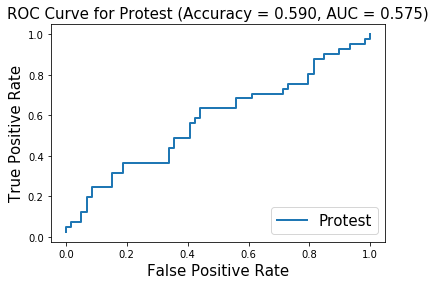

In [44]:
au.PlotROC("protest", test_protest, preds_protest)

### Visual

sign


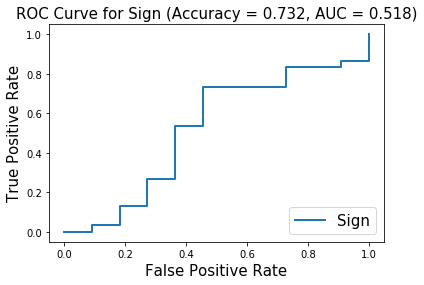

photo


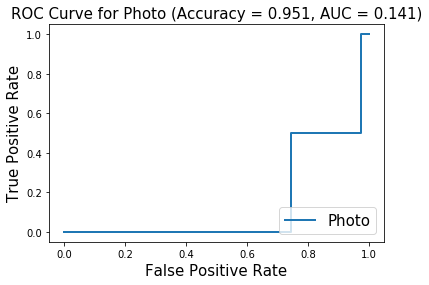

fire


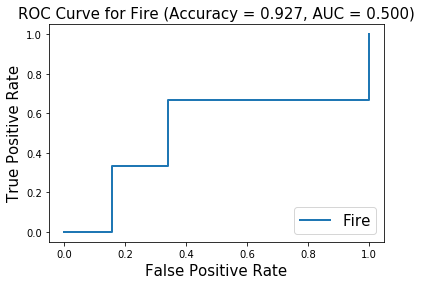

police


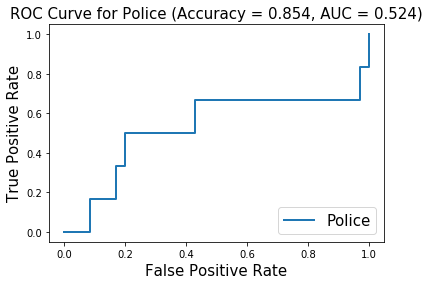

children
Only one class present in y_true. ROC AUC score is not defined in that case.
group_20


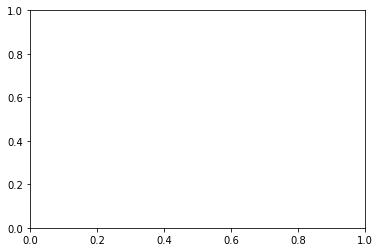

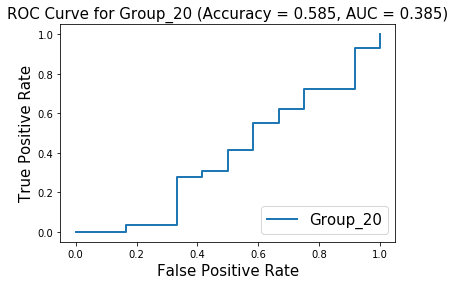

group_100


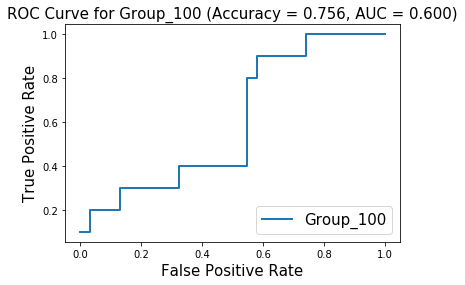

flag


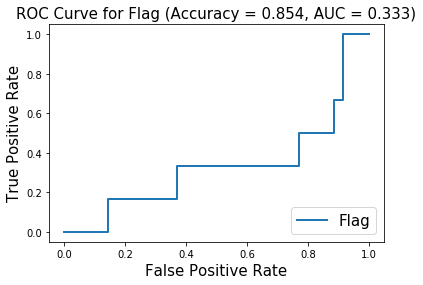

night


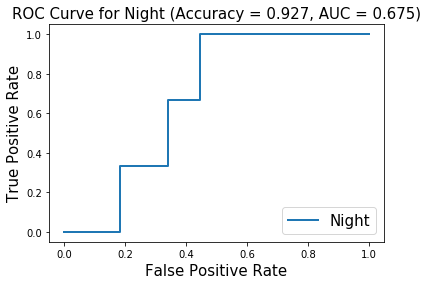

shouting


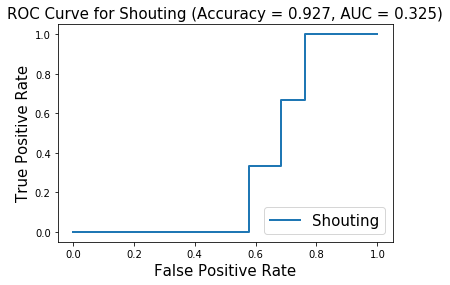

In [46]:
for i in range(preds_visual.shape[1]):
    pred = preds_visual[:,i]
    target = test_visual[:,i]
    
    # remove masked values from test set
    target_non_masked = target[target!= -1]
    pred_non_masked = pred[target!= -1]
    
    attr_indx = 3 + i # the visual attributes start from the 4th pos
    attr = df.columns[attr_indx]
    print(attr)
    try:
        au.PlotROC(attr, target_non_masked, pred_non_masked)
    except Exception as e:
        print(e)

### Violence

In [47]:
# remove masked values from test set
non_masked_violence_true = test_violence[test_violence!= -1].tolist()
non_masked_violence_preds = preds_violence[test_violence!= -1].flatten().tolist()

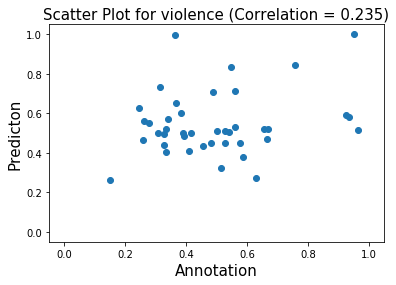

In [48]:
fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = "violence", corr= corr)), fontsize = 15)
plt.show()